In [179]:
import pandas as pd

In [181]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Coffee_Shop_Sales.csv")

In [183]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01-01-2023,07:06:11,2.0,5.0,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01-01-2023,07:08:56,2.0,5.0,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01-01-2023,07:14:04,NaN,NaN,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01-01-2023,07:20:24,1.0,5.0,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,NaN,07:22:41,2.0,5.0,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149113,149452,30-06-2023,20:18:41,2.0,8.0,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149114,149453,30-06-2023,20:25:10,2.0,8.0,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149115,149454,30-06-2023,20:31:34,1.0,8.0,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149116,149455,30-06-2023,20:57:19,1.0,8.0,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [185]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149118.000000,149116.000000,149117.000000,149118.000000,149118.000000
mean,74736.369747,1.438283,5.342080,47.918621,3.382223
std,43154.178165,0.542510,2.074245,17.929931,2.658705
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37334.250000,1.000000,3.000000,33.000000,2.500000
50%,74726.500000,1.000000,5.000000,47.000000,3.000000
75%,112093.750000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [187]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149113    False
149114    False
149115    False
149116    False
149117    False
Length: 149118, dtype: bool

In [189]:
df.duplicated().sum()

2

In [191]:
df=df.drop_duplicates()

In [193]:
df.duplicated().sum()

0

In [195]:
df.count()

transaction_id      149116
transaction_date    149115
transaction_time    149116
transaction_qty     149114
store_id            149115
store_location      149116
product_id          149116
unit_price          149116
product_category    149116
product_type        149115
product_detail      149116
dtype: int64

In [197]:
df.isnull().sum()

transaction_id      0
transaction_date    1
transaction_time    0
transaction_qty     2
store_id            1
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        1
product_detail      0
dtype: int64

In [199]:
df.loc[:,"transaction_date"]=df["transaction_date"].ffill()

In [201]:
df["transaction_date"].isnull().sum()

0

In [203]:
df.loc[:,"store_id"]=df["store_id"].ffill()

In [205]:
df["store_id"].isnull().sum()

0

In [231]:
df["transaction_qty"].fillna(df["transaction_qty"].mode()[0])

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
149113    2.0
149114    2.0
149115    1.0
149116    1.0
149117    2.0
Name: transaction_qty, Length: 149116, dtype: float64

In [233]:
df["transaction_qty"].isnull().sum()

0

In [249]:
df['product_type'].fillna('Unknown')

0         Gourmet brewed coffee
1               Brewed Chai tea
2                 Hot chocolate
3                   Drip coffee
4               Brewed Chai tea
                  ...          
149113        Brewed herbal tea
149114         Brewed Black tea
149115        Brewed herbal tea
149116         Barista Espresso
149117            Regular syrup
Name: product_type, Length: 149116, dtype: object

In [251]:
df.product_type[15]

'Unknown'

In [253]:
df["product_type"].isnull().sum()

0

In [255]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [257]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty     float64
store_id            float64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

In [273]:
df['transaction_date']=pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

0        2023-01-01
1        2023-01-01
2        2023-01-01
3        2023-01-01
4        2023-01-01
            ...    
149113   2023-06-30
149114   2023-06-30
149115   2023-06-30
149116   2023-06-30
149117   2023-06-30
Name: transaction_date, Length: 149116, dtype: datetime64[ns]

In [269]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty            float64
store_id                   float64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [129]:

df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

In [131]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time    datetime64[ns]
transaction_qty            float64
store_id                   float64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [275]:
numeric_df=df.drop(columns=df.select_dtypes(exclude="number").columns)
numeric_df.corr()

,transaction_id,transaction_qty,store_id,product_id,unit_price
transaction_id,1.000000,0.010272,-0.006054,0.001076,0.000836
transaction_qty,0.010272,1.000000,-0.000792,-0.175263,-0.123551
store_id,-0.006054,-0.000792,1.000000,0.025727,0.001891
product_id,0.001076,-0.175263,0.025727,1.000000,-0.140423
unit_price,0.000836,-0.123551,0.001891,-0.140423,1.000000


In [277]:
df.dtypes[df.dtypes=="object"]

transaction_time    object
store_location      object
product_category    object
product_type        object
product_detail      object
dtype: object

<Axes: xlabel='product_type'>

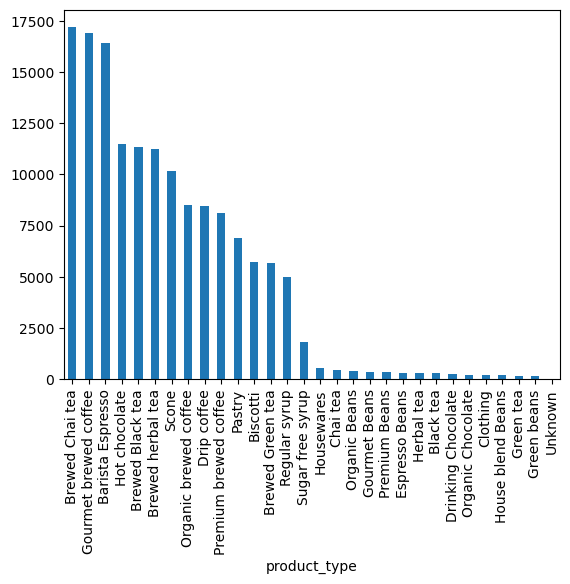

In [279]:
df["product_type"].value_counts().plot(kind="bar")

<Axes: xlabel='product_type'>

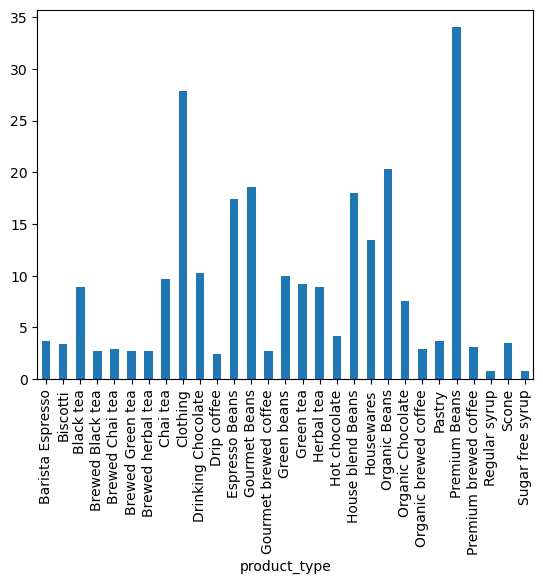

In [136]:
df.groupby("product_type")["unit_price"].mean().plot(kind="bar")

<Axes: >

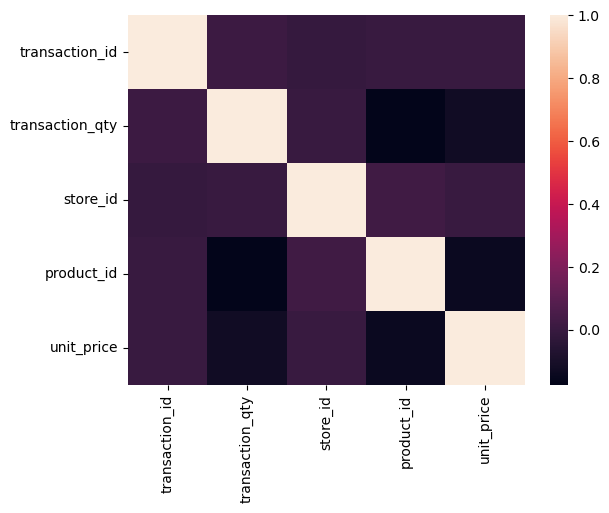

In [139]:
import seaborn as sns
sns.heatmap(numeric_df.corr())

<Axes: >

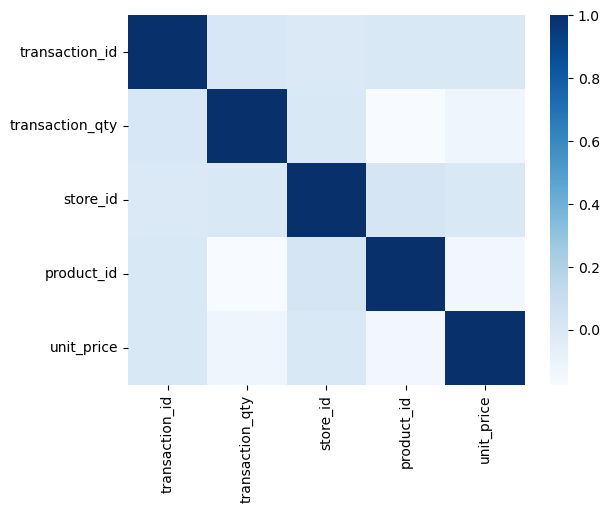

In [142]:
sns.heatmap(numeric_df.corr(),cmap="Blues")

<Axes: >

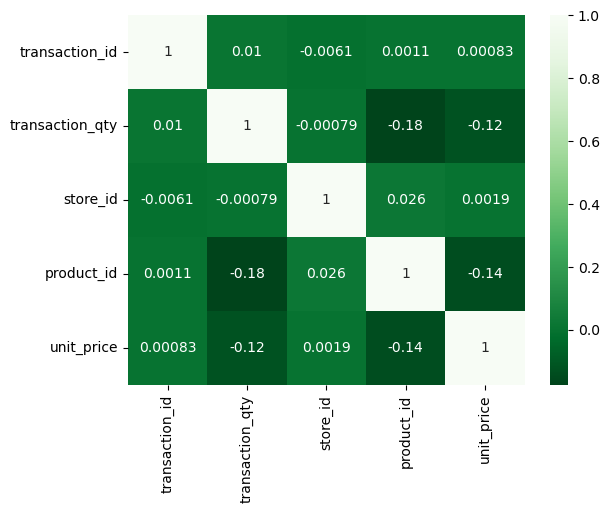

In [145]:
sns.heatmap(numeric_df.corr(),cmap="Greens_r",annot=True)